# GIT, Github y GitFlow

---
# Qué es un control de versiones?


*   Colaboración
*   Versionado
*   Restauracion (rolling back)
*   Entendimiento
*   Respaldo descentralizado (de alguna manera)

---
# Git y Github


Git ➡ Sistema de control de versiones de un repositorio local

Github ➡ Sitio web para almacenar y compartir repositorios de Git de manera remota (en la web)... es decir repositorio remoto

## Sobre cómo funciona git

<img src="https://librarycarpentry.org/lc-git/fig/git-staging-area.svg">

working directory -> staging o index area -> repository o historial (log) de commits

---
# Empezando a usar Git

## Configuración inicial

Descargalo desde su [pagina oficial](https://git-scm.com/downloads) e instalalo.

```shell
$ git config --global user.name "Juan Maniglia"
$ git config --global user.email "jamr1989@gmail.com"
```

recuerda que el email debera ser el mismo que usaras en tu cuenta de github, para evitar problemas con la autenticación después.

## Creando un repositorio local

```shell
$ mkdir carpeta_del_proyecto
$ cd carpeta_del_proyecto
$ git init
```

Ahora  la carpeta "carpeta_del_proyecto" es un repositorio de Git.

Dentro de la carpeta existe ahora una carpeta oculta llamada ".git", la podemos ver al usar el siguiente comando:

```shell
$ ls -a
```

## Creando un archivo y agregandolo.
### add y commit

```shell
$ touch descripcion_del_proyecto.md
$ git status
$ git add descripcion_del_proyecto.md
$ git commit -m "Agregando la descripcion del proyecto"
$ git log
```


## HEAD... un apuntador de apuntadores

se mueve con 
$ git checkout
$ git reset (evita el detached HEAD state, moviendo tambien la punta de la rama)

---
# Git y Github individualmente 👤💻

## Creando un repositorio remoto en Github desde Git (Forma 1)

### Autenticacion (HTTPS vs SSH)

#### Autenticacion SSH 

```shell
$ ls -al ~/.ssh
$ ssh-keygen -t ed25519 -C "yourname@domain.name"
```

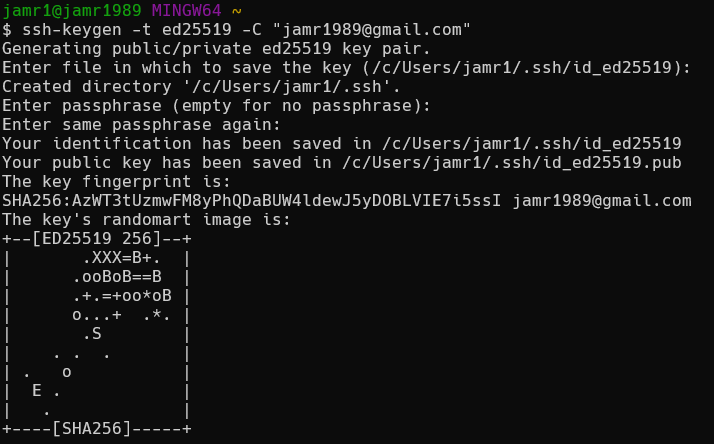

Y luego copiar el contenido que se encuentra en ~/.ssh/id_ed25519.pub

Ahora creamos la SSH Public Key en Github

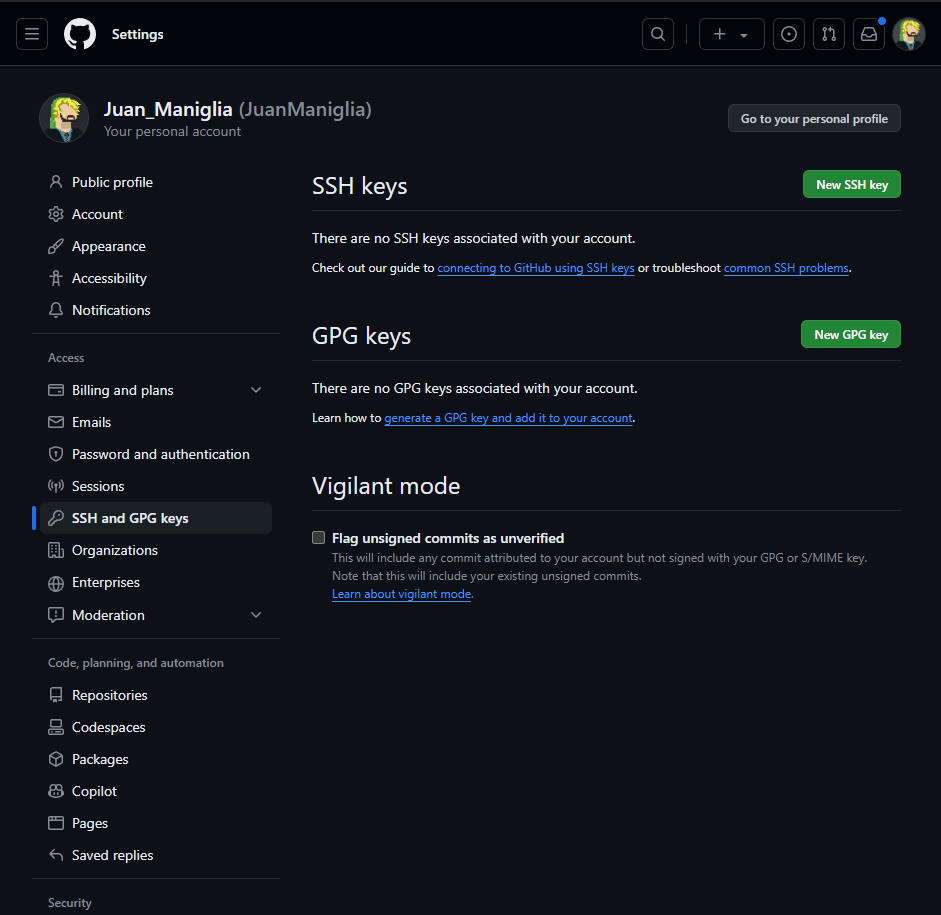

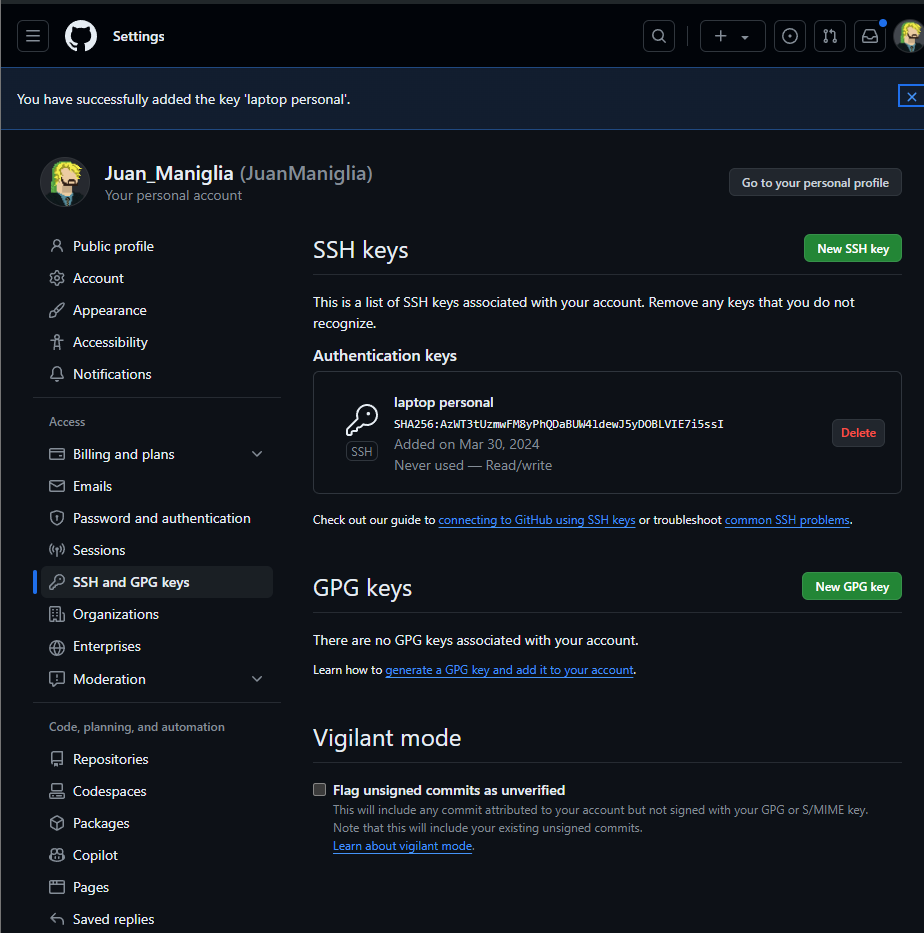

## Creando repositorio remoto en github y luego usando git clone para crear repositorio en git (Forma 2)

En tu terminal colocas (recuerda primero tener bien seteada la autorizacion):

https: 

```shell
$ git clone https://github.com/[username]/[repo_name].git
```

ssh: 

```shell
$ git clone git@github.com/[username]/[repo_name].git
```

## Usando git periódicamente

```shell
$ git status
$ git add archivo_1 archivo_2 ... archivo_n
$ git commit -m "mensaje concreto que describa el cambio"
$ git push
$ git pull
$ git commit --ammend
$ git log --oneline --graph --all --stats
$ git reflog
$ git diff <hash_del_commit_mas_viejo> <hash_del_commit_mas_nuevo> notacion HEAD~<nro>
$ git tag -a vNro -m "Mensaje representativo"
```

```shell
$ git reset --soft < hash_del_commit o notacion con HEAD~<nro> >
$ git reset < hash_del_commit o notacion con HEAD~<nro> >
$ git reset --hard < hash_del_commit o notacion con HEAD~<nro> >
$ git revert # CREATES A NEW COMMIT
$ git cherry-pick hash_del_commit
```
Cambian los archivos que estan dentro de la zona de staging y nos ofrecen control sobre donde HEAD deberia apuntar. Recordar que HEAD es el apuntador que indica en que commit te encuentras actualmente.

- **soft**: devuelve cambios al area de staging, mueve el HEAD hacia donde lo indiques, mantiene los cambios en el directorio actual que ocurrieron desde donde apuntaba HEAD.

- sin argumento (**mixed**): devuelve el cambio al working directory y el HEAD  a donde le indiques.

- **hard**: elimina los cambios en el working directory, mueve el HEAD a donde le indiques. (git por favor olvida todo lo que hice)

- el **revert** crea un nuevo commit que revierte los cambios de un commit anterior.

- **cherry-pick**: crea un nuevo commit con los cambios del commit que fue "picked" de otra rama


---
# Git y Github de manera colaborativa 👥 💻 👥

## Trabajando con distintas ramas (branches)

```shell
$ git branch -a
$ git branch nombre_branch
$ git checkout nombre_branch
$ git checkout -b nombre_branch # curioso
$ git push -u origin nombre_branch
$ git fetch --all
$ git branch -d nombre_branch

$ git checkout main
$ git merge nombre_branch
```

git checkout permite mover el HEAD, HEAD es el apuntador que indica en que commit te encuentras actualmente.

Se puede usar checkout para moverse entre commits pero tambien entre ramas

## Pull request

Se realizan para solicitar el merge de una rama sobre la otra, de manera intuitiva es como solicitar a la otra rama que haga un pull para traer los cambios de la rama sobre la cual yo estoy trabajando.

## Combinar branches (merge) -> un nuevo commit combinando

### merge sin conflictos

se mergean dos ramas que no tienen cambios en los mismos sitios.

### merge con conflicto

- el conflicto surge cuando tratas de hacer un merge donde hay conflictos en el set de cambios.
- git usa un algoritmo sencillo "three-way" para detectar conflictos.

se realiza un merge con dos ramas que han modificado los mismos archivos (git que le has hecho a mis archivos???), se soluciona manualmente el conflicto.

- resuelves el conflicto 
- vuelves atras con git reset --hard HEAD y comienzas de nuevo
    - $ git config merge.conflictstyle diff3 (default es git config --unset merge.conflictstyle)
    - esta manera te permite ver cual es el ancestro comun de ambos y asi saber cual fue el que agrego mas o menos y saber cual conviene mas modificar.

### merge con fast-forward

despues de haber mergeado una rama al querer actualizar esa rama con los cambios de la principal entonces sucede un fast forward que lleva la rama a ese commit.

## Combinar branches (rebase) -> un nuevo commit "cortando y pegando" una branch sobre otra

regla de oro:

Elige el rebase solo cuando la rama en la que estas no es compartida con nadie mas, recuerda que esta re-escribiendo la historia del repositorio (log de commits).  Si se realiza un rebase de una rama compartida deberas coordinar con tu equipo.

```shell
git rebase branch_name
```

---
# Workflows en Git 🍃


## Gitflow 

<img src="https://blog.shaankhan.dev/content/images/size/w1600/2021/07/gitFlow.png" width="700">


- main (o master) (larga vida)
- develop (larga vida)
- feature
- release
- hotfix


<img src="https://github.com/charlypythonist/img_git_class_repo/blob/main/imgs/11_gitflow.JPG?raw=true">

Util si estas construyendo un software versionado, especialmente si se necesita support de distintas versiones (por ejemplo una 2.0 que es paga y una 1.0 que sigue con releases pequeños para arreglar bugs)

Tambien si tienes un ciclo regular de realease te beneficia debido a que su rama de release permite testear y estabilizar el release antes del deployment.

Es menos ideal en escenarios con modelo de deployment continuo como por ejemplo en desarrollo web. Algo que su mismo creador (Vincent Driessen) expreso en su blog original 10 años despues de haber posteado el blog original.

## Trunk-Based Development

<img src="https://uploads.toptal.io/blog/image/124319/toptal-blog-image-1507018418276-5236f6ebfd31c78b442562d4d202763c.png" width="700">


- equipos pequeños donde cada persona se encarga de un area especifica
- para un desarrollo mas rápido

## diferencias claves

|GitFlow|Trunk-Based|
|-------|-----------|
|lejos de la rama main|cerca de la rama main|
|se deploya rama release derivada de rama develop|main siempre esta lista para ser deployada|
|poco seniority|equipo con experiencia y bien estructurado|
|Producto complejo, maduro y monolitico|microservicios, prototipos, poco tiempo|
|el deploy es pautado cada cierto tiempo| el deploy es continuo e independiente|